In [23]:
!pip install seaborn

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
player_stats = pd.read_csv('/content/MATCH-RESULTS.csv')
season_stats = pd.read_csv('/content/SEASON-STATS.csv')
match_results = pd.read_csv('/content/MATCH-RESULTS.csv')

last_two_seasons = sorted(match_results['Season_End_Year'].unique())[-2:] # Filter data to only include the last two seasons
# player_stats = player_stats[player_stats['Season'].isin(last_two_seasons)] # Same
season_stats = season_stats[season_stats['Season_End_Year'].isin(last_two_seasons)] # Same
match_results = match_results[match_results['Season_End_Year'].isin(last_two_seasons)] #Same

sns.set_style('whitegrid')


In [40]:
season_stats.head()

,Competition_Name,Gender,Country,Season_End_Year,Squad,Team_or_Opponent,Num_Players,Age,Poss,MP_Playing_Time,...,npxG_Expected,xAG_Expected,npxG_plus_xAG_Expected,PrgC_Progression,PrgP_Progression,xG_Per_Minutes,xAG_Per_Minutes,xG_plus_xAG_Per_Minutes,npxG_Per_Minutes,npxG_plus_xAG_Per_Minutes
24,La Liga,M,ESP,2022,Barcelona,team,38,26.2,64.2,38,...,57.9,47.6,105.5,961.0,2079.0,1.67,1.25,2.92,1.52,2.78
25,La Liga,M,ESP,2022,Real Madrid,team,31,27.7,59.9,38,...,62.2,50.7,112.9,1029.0,2078.0,1.89,1.33,3.22,1.64,2.97
26,La Liga,M,ESP,2023,Barcelona,team,29,25.9,64.3,38,...,74.0,60.1,134.1,963.0,2181.0,1.99,1.58,3.57,1.95,3.53
27,La Liga,M,ESP,2023,Real Madrid,team,26,27.4,60.9,38,...,66.1,56.8,122.9,1008.0,2017.0,1.99,1.49,3.48,1.74,3.23


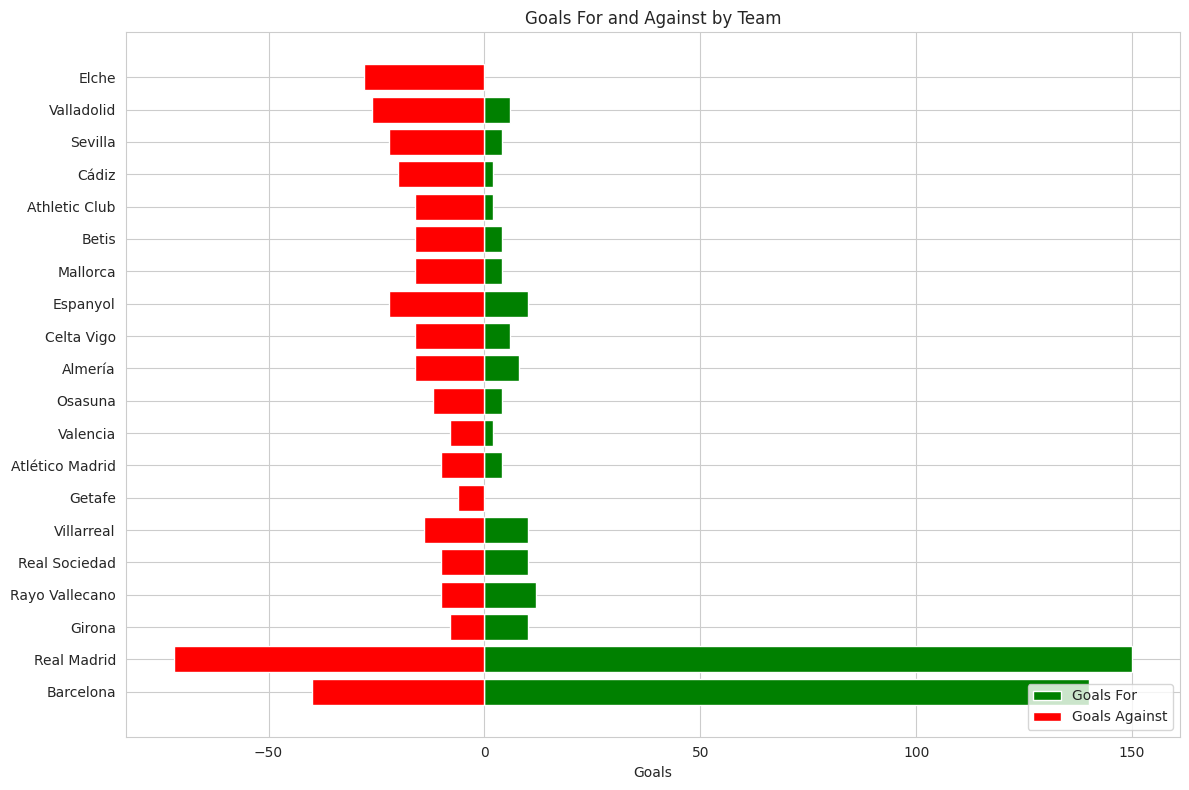

In [25]:
# Goals For and Against by Team
def plot_goals_for_against(match_results):
    # Calculate goals for and against for each team
    home_stats = match_results.groupby('Home').agg({'HomeGoals': 'sum', 'AwayGoals': 'sum'}).reset_index()
    away_stats = match_results.groupby('Away').agg({'AwayGoals': 'sum', 'HomeGoals': 'sum'}).reset_index()

    home_stats = home_stats.rename(columns={'Home': 'Squad', 'HomeGoals': 'Goals_For_Home', 'AwayGoals': 'Goals_Against_Home'})
    away_stats = away_stats.rename(columns={'Away': 'Squad', 'AwayGoals': 'Goals_For_Away', 'HomeGoals': 'Goals_Against_Away'})

    # Merge home and away stats
    total_goals = pd.merge(home_stats, away_stats, on='Squad', how='outer').fillna(0)

    # Calculate total goals for and against
    total_goals['Goals_For'] = total_goals['Goals_For_Home'] + total_goals['Goals_For_Away']
    total_goals['Goals_Against'] = total_goals['Goals_Against_Home'] + total_goals['Goals_Against_Away']
    total_goals['Goal_Difference'] = total_goals['Goals_For'] - total_goals['Goals_Against']

    # Sort teams by goal difference
    total_goals = total_goals.sort_values('Goal_Difference', ascending=False)

    # Plotting goals for and against
    plt.figure(figsize=(12, 8))
    plt.barh(total_goals['Squad'], total_goals['Goals_For'], color='green', label='Goals For')
    plt.barh(total_goals['Squad'], -total_goals['Goals_Against'], color='red', label='Goals Against')
    plt.title('Goals For and Against by Team')
    plt.xlabel('Goals')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plot_goals_for_against(match_results)

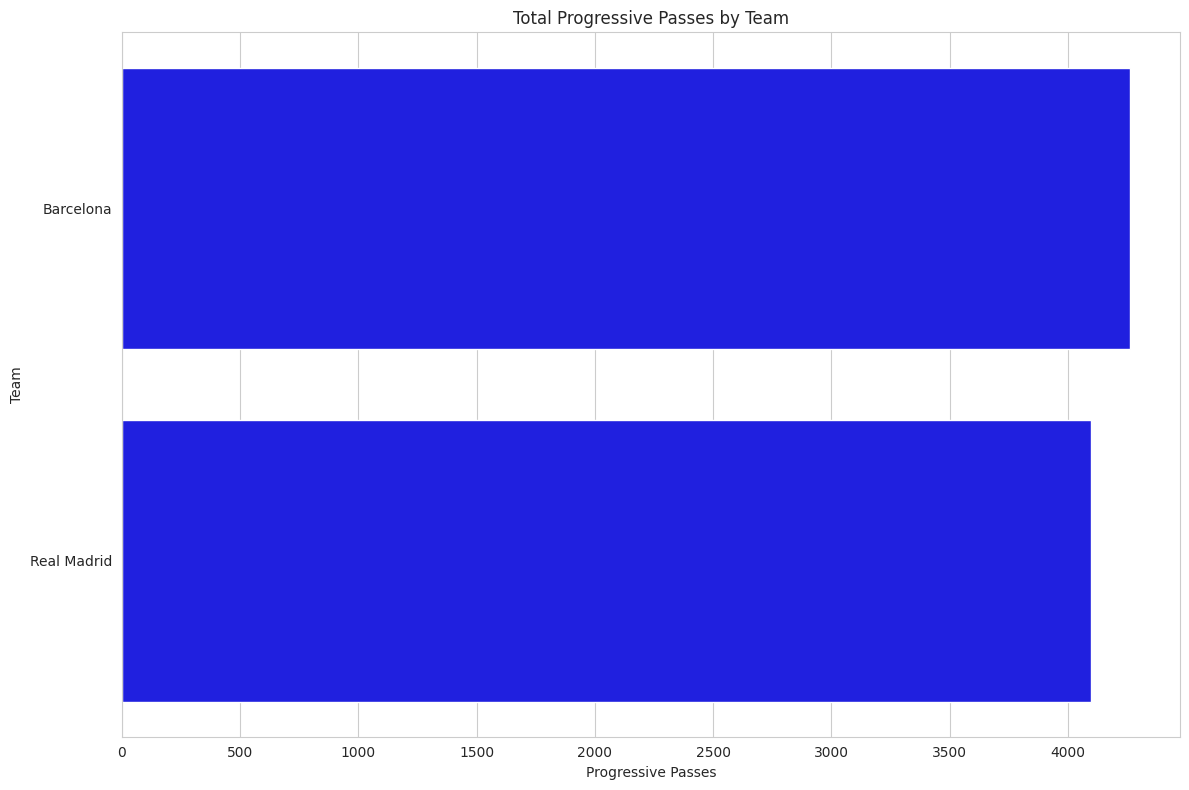

In [26]:
# Progressive Passes by Team
def plot_passing_progression(season_stats):
    if 'PrgP_Progression' not in season_stats.columns:
        print("Column 'PrgP_Progression' not found in season_stats.")
        return

    # Aggregate progressive passes for each team
    passing_stats = season_stats.groupby('Squad')['PrgP_Progression'].sum().reset_index()
    passing_stats = passing_stats.sort_values('PrgP_Progression', ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(data=passing_stats, x='PrgP_Progression', y='Squad', color='blue')
    plt.title('Total Progressive Passes by Team')
    plt.xlabel('Progressive Passes')
    plt.ylabel('Team')
    plt.tight_layout()
    plt.show()

plot_passing_progression(season_stats)

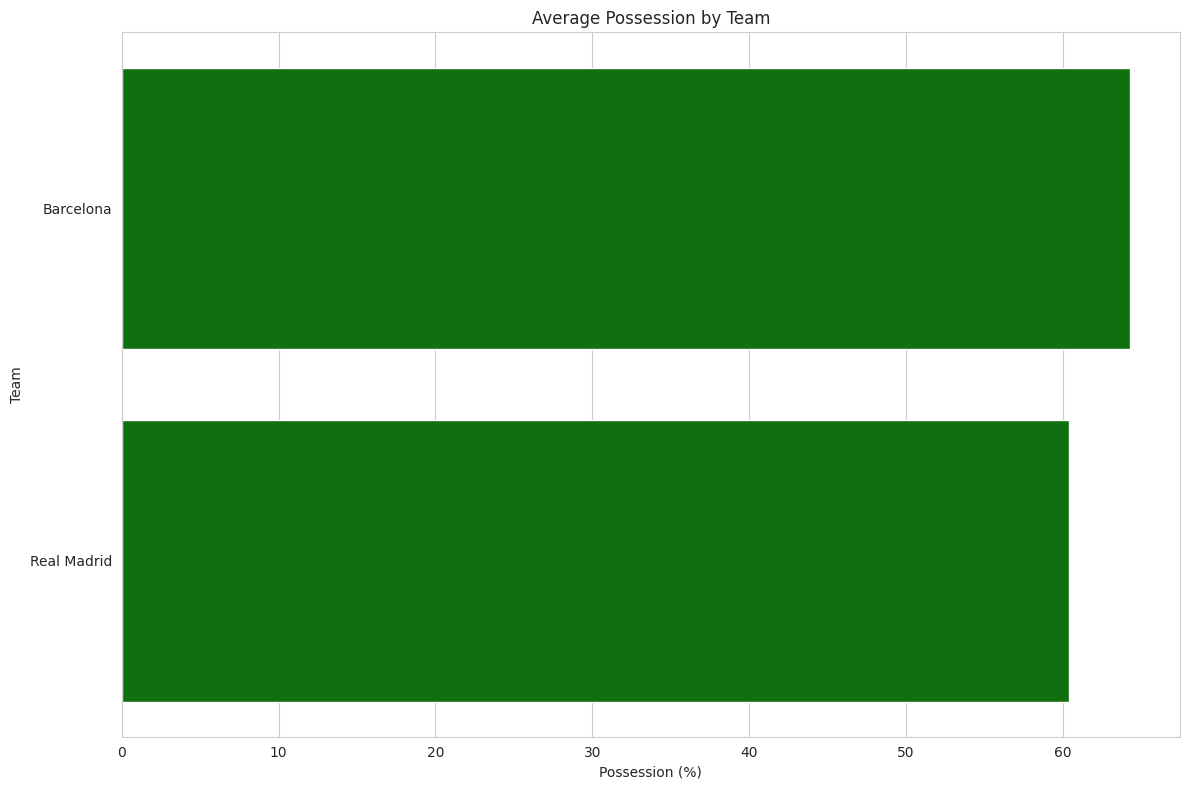

In [27]:
# Average Possession by Team
def plot_possession_stats(season_stats):
    if 'Poss' not in season_stats.columns: # checks if Poss column exists
        print("Column 'Poss' not found in season_stats.")
        return

    possession = season_stats.groupby('Squad')['Poss'].mean().reset_index()
    possession = possession.sort_values('Poss', ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(data=possession, x='Poss', y='Squad', color='green')
    plt.title('Average Possession by Team')
    plt.xlabel('Possession (%)')
    plt.ylabel('Team')
    plt.tight_layout()
    plt.show()

plot_possession_stats(season_stats)

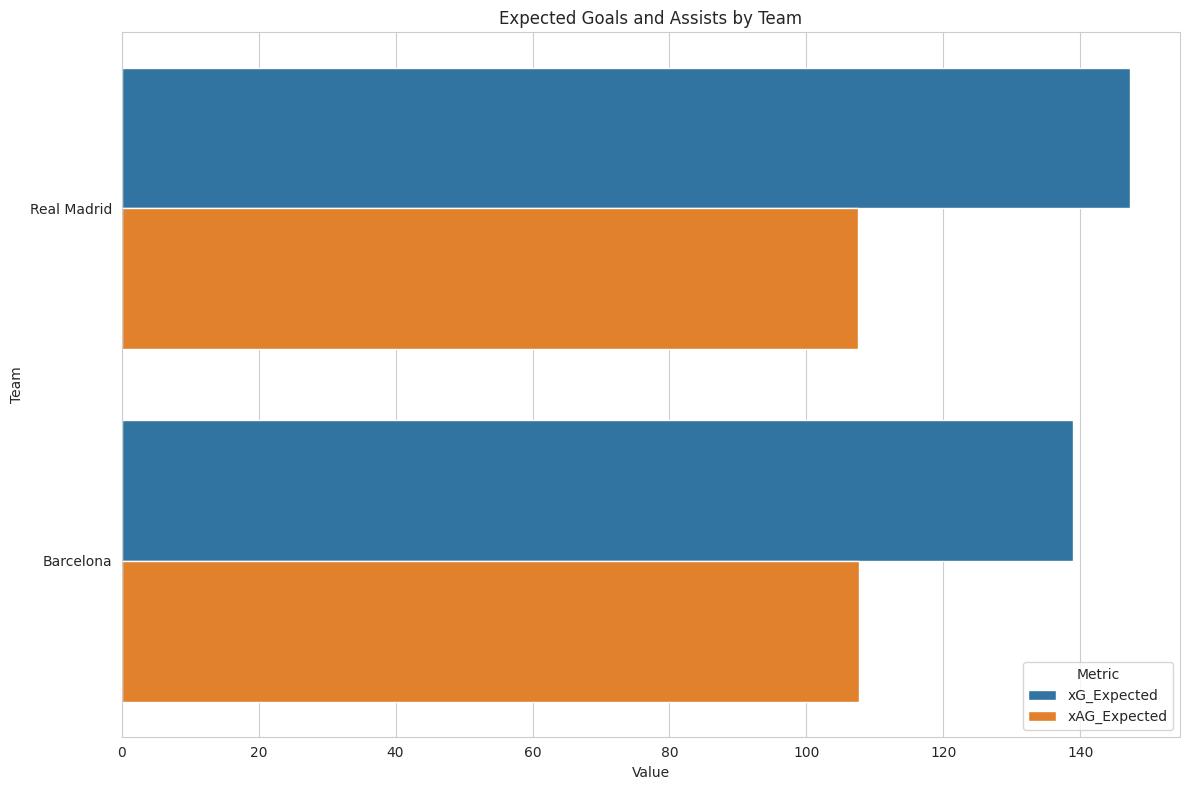

In [28]:
# Expected Goals and Assists by Team
def plot_shooting_stats(season_stats):
    required_columns = ['Squad', 'xG_Expected', 'xAG_Expected']
    for col in required_columns:
        if col not in season_stats.columns:
            print(f"Column '{col}' not found in season_stats.")
            return

    shooting_stats = season_stats.groupby('Squad')[['xG_Expected', 'xAG_Expected']].sum().reset_index()
    shooting_stats = shooting_stats.sort_values('xG_Expected', ascending=False)

    # Melt the dataframe for plotting
    shooting_stats_melted = shooting_stats.melt(id_vars='Squad', value_vars=['xG_Expected', 'xAG_Expected'], var_name='Metric', value_name='Value')

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(data=shooting_stats_melted, x='Value', y='Squad', hue='Metric')
    plt.title('Expected Goals and Assists by Team')
    plt.xlabel('Value')
    plt.ylabel('Team')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

plot_shooting_stats(season_stats)

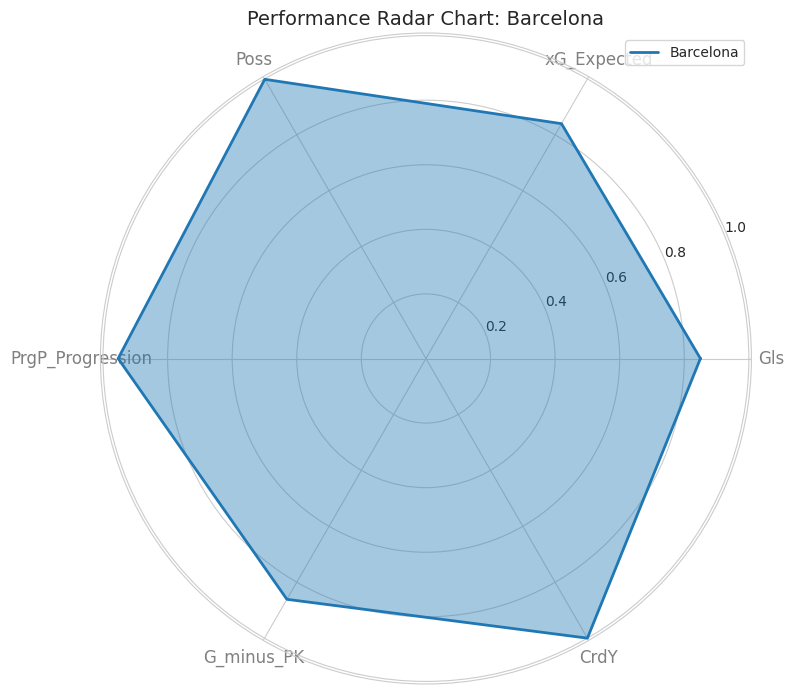

In [29]:
# Team Performance Radar Chart
def plot_team_performance_radar(team_name, season_stats):
    # Select team data
    team_data = season_stats[season_stats['Squad'] == team_name]
    if team_data.empty:
        print(f"No data found for team {team_name}")
        return
    team_data = team_data.iloc[0]
    categories = ['Gls', 'xG_Expected', 'Poss', 'PrgP_Progression', 'G_minus_PK', 'CrdY']

    # Check if all required categories exist
    for cat in categories:
        if cat not in season_stats.columns:
            print(f"Column '{cat}' not found in season_stats.")
            return

    values = [team_data[cat] for cat in categories]

    # Normalize the values between 0 and 1
    max_values = season_stats[categories].max()
    values = [v / max_values[cat] if max_values[cat] != 0 else 0 for v, cat in zip(values, categories)]

    # Number of variables we're plotting
    N = len(categories)

    # Repeat the first value to close the circular graph
    values += values[:1]

    # Calculate angle for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Plotting
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=12)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=team_name)
    ax.fill(angles, values, alpha=0.4)
    plt.title(f'Performance Radar Chart: {team_name}', size=14)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Example usage (replace 'Team Name' with an actual team from your dataset):
plot_team_performance_radar('Barcelona', season_stats)

--------------------------------------------------------------------------------
The plot shows how well teams performed in terms of scoring relative to their expected goals:
- Teams above the diagonal line have exceeded their expected goals (scored more than expected).
- Teams below the diagonal line have underperformed (scored fewer goals than expected).

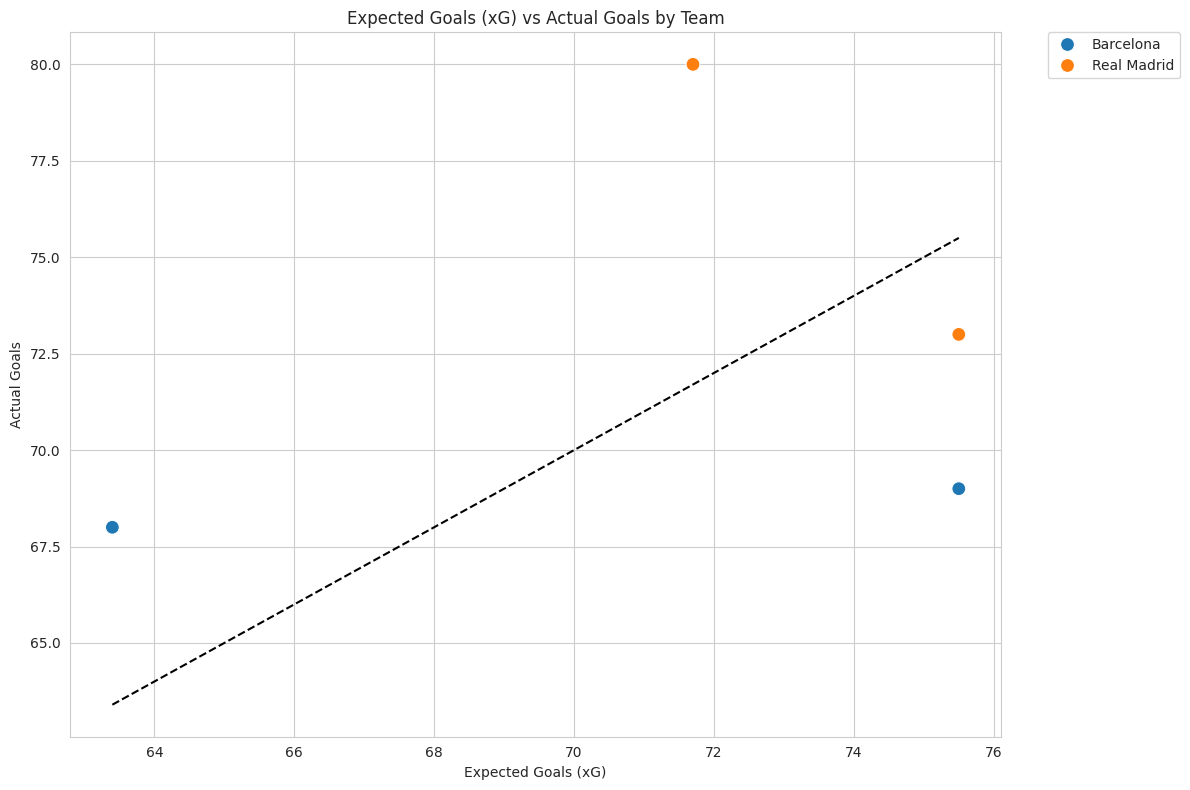

In [30]:
# Expected Goals vs Actual Goals by Team
def plot_team_xg_vs_goals(season_stats):
    if 'xG_Expected' not in season_stats.columns or 'Gls' not in season_stats.columns:
        print("Required columns not found in season_stats.")
        return

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=season_stats, x='xG_Expected', y='Gls', hue='Squad', s=100)
    plt.plot([season_stats['xG_Expected'].min(), season_stats['xG_Expected'].max()],
             [season_stats['xG_Expected'].min(), season_stats['xG_Expected'].max()], 'k--')
    plt.title('Expected Goals (xG) vs Actual Goals by Team')
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Actual Goals')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()

plot_team_xg_vs_goals(season_stats)

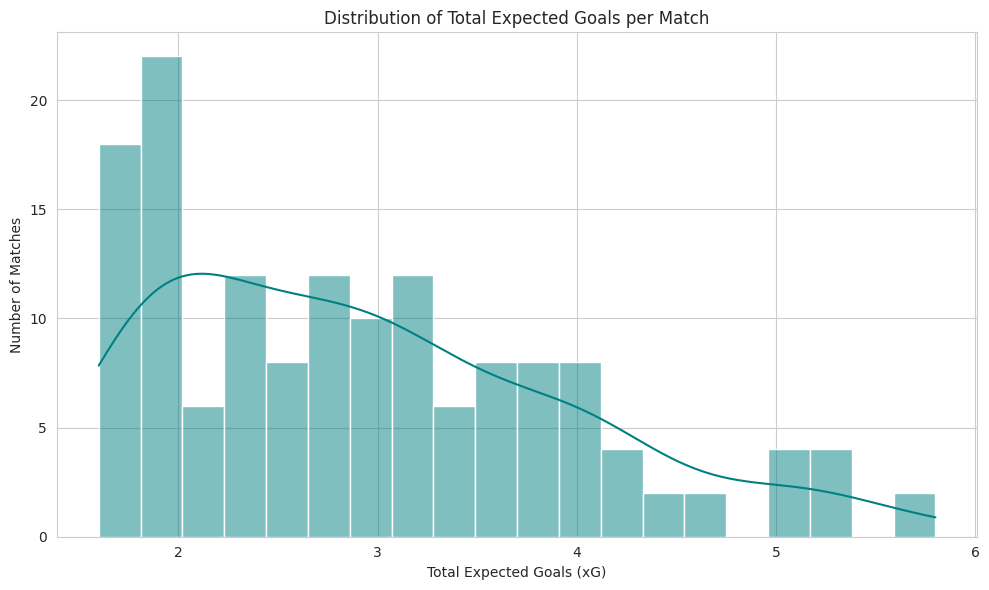

In [31]:
# Distribution of Expected Goals (xG) per Match
def plot_xg_distribution_per_match(match_results):
    if 'Home_xG' not in match_results.columns or 'Away_xG' not in match_results.columns:
        print("Required columns not found in match_results.")
        return

    match_results['Total_xG'] = match_results['Home_xG'] + match_results['Away_xG']

    plt.figure(figsize=(10, 6))
    sns.histplot(match_results['Total_xG'], bins=20, kde=True, color='teal')
    plt.title('Distribution of Total Expected Goals per Match')
    plt.xlabel('Total Expected Goals (xG)')
    plt.ylabel('Number of Matches')
    plt.tight_layout()
    plt.show()

plot_xg_distribution_per_match(match_results)

In [32]:
import pandas as pd

# Creating a DataFrame
df = match_results
season_stats = season_stats  # Assuming season_stats is already defined

# Feature Engineering for Real Madrid and Barcelona

# Step 1: Goals and xG for Real Madrid and Barcelona (Home and Away)
teams = ["Real Madrid", "Barcelona"]

# Create a new DataFrame to store the aggregated stats for both teams
team_stats = pd.DataFrame(columns=['Team', 'Goals_For', 'Goals_Against', 'xG_For', 'xG_Against', 'Poss', 'PrgP_Progression'])

for team in teams:
    # Filter Home matches for the team
    home_matches = df[df['Home'] == team]
    home_goals_for = home_matches['HomeGoals'].sum()
    home_goals_against = home_matches['AwayGoals'].sum()
    home_xg_for = home_matches['Home_xG'].sum()
    home_xg_against = home_matches['Away_xG'].sum()

    # Filter Away matches for the team
    away_matches = df[df['Away'] == team]
    away_goals_for = away_matches['AwayGoals'].sum()
    away_goals_against = away_matches['HomeGoals'].sum()
    away_xg_for = away_matches['Away_xG'].sum()
    away_xg_against = away_matches['Home_xG'].sum()

    # Calculate totals
    total_goals_for = home_goals_for + away_goals_for
    total_goals_against = home_goals_against + away_goals_against
    total_xg_for = home_xg_for + away_xg_for
    total_xg_against = home_xg_against + away_xg_against

    # Get Possession and Progression stats from season_stats
    possession = season_stats.groupby('Squad')['Poss'].mean().reset_index()
    possession = possession.sort_values('Poss', ascending=False)
    passing_stats = season_stats.groupby('Squad')['PrgP_Progression'].sum().reset_index()
    passing_stats = passing_stats.sort_values('PrgP_Progression', ascending=False)



    # Create a new DataFrame for the current team's stats
    team_data = pd.DataFrame({
        'Team': [team],
        'Goals_For': [total_goals_for],
        'Goals_Against': [total_goals_against],
        'xG_For': [total_xg_for],
        'xG_Against': [total_xg_against],
        'Poss': [possession],
        'PrgP_Progression': [passing_stats]
    })

    # Concatenate the new team_data with the existing team_stats
    team_stats = pd.concat([team_stats, team_data], ignore_index=True)

# Display the aggregated stats for Real Madrid and Barcelona
print(team_stats)


          Team Goals_For Goals_Against  xG_For  xG_Against  \
0  Real Madrid       150            72   151.8        77.6   
1    Barcelona       140            40   151.0        66.4   

                                                Poss  \
0           Squad   Poss
0    Barcelona  64.25
1 ...   
1           Squad   Poss
0    Barcelona  64.25
1 ...   

                                    PrgP_Progression  
0           Squad  PrgP_Progression
0    Barcelon...  
1           Squad  PrgP_Progression
0    Barcelon...  


<ipython-input-32-915081fad8ab>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  team_stats = pd.concat([team_stats, team_data], ignore_index=True)


In [39]:
team_stats.head()

,Team,Goals_For,Goals_Against,xG_For,xG_Against,Poss,PrgP_Progression
0,Real Madrid,150,72,151.8,77.6,Squad Poss 0 Barcelona 64.25 1 ...,Squad PrgP_Progression 0 Barcelon...
1,Barcelona,140,40,151.0,66.4,Squad Poss 0 Barcelona 64.25 1 ...,Squad PrgP_Progression 0 Barcelon...


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'match_results' is your DataFrame
df = match_results

# Step 1: Create a target variable for match outcome (Home win = 2, Draw = 1, Home loss = 0)
def match_outcome(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 2  # Home win
    elif row['HomeGoals'] < row['AwayGoals']:
        return 0  # Home loss
    else:
        return 1  # Draw

df['Outcome'] = df.apply(match_outcome, axis=1)

# Step 2: Select features (Home xG, Away xG, Attendance)
features = ['Home_xG', 'Away_xG', 'Attendance']
X = df[features]
y = df['Outcome']

# Step 3: Split the data into training and test sets
# Keep track of indices to identify specific matches later
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

# Step 4: Define a dictionary of models to evaluate
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Step 5: Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy * 100:.2f}%")

# Step 6: Focus on XGBoost model for detailed predictions
# Refit the XGBoost model (already trained above)
xgb_model = models['XGBoost']

# Predict probabilities using XGBoost
y_pred_proba = xgb_model.predict_proba(X_test)

# Step 7: Output certain matches and the probability of a team winning that match
# Let's select the first 5 matches in the test set
selected_indices = idx_test[:5]

print("\nSelected Matches and Predicted Probabilities (using XGBoost):")
for idx in selected_indices:
    match_info = df.loc[idx]
    home_team = match_info['Home']
    away_team = match_info['Away']
    probs = xgb_model.predict_proba(X_test.loc[[idx]])[0]
    outcome_probs = {
        'Home Loss': probs[0],
        'Draw': probs[1],
        'Home Win': probs[2]
    }
    predicted_outcome = ['Home Loss', 'Draw', 'Home Win'][xgb_model.predict(X_test.loc[[idx]])[0]]
    actual_outcome = ['Home Loss', 'Draw', 'Home Win'][y_test.loc[idx]]
    print(f"\nMatch: {home_team} vs {away_team}")
    print(f"Predicted Probabilities:")
    for outcome, prob in outcome_probs.items():
        print(f"  {outcome}: {prob * 100:.2f}%")
    print(f"Predicted Outcome: {predicted_outcome}")
    print(f"Actual Outcome: {actual_outcome}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost accuracy: 80.00%
Logistic Regression accuracy: 60.00%
Random Forest accuracy: 86.67%
Support Vector Machine accuracy: 63.33%
Decision Tree accuracy: 86.67%
K-Nearest Neighbors accuracy: 66.67%

Selected Matches and Predicted Probabilities (using XGBoost):

Match: Barcelona vs Osasuna
Predicted Probabilities:
  Home Loss: 0.07%
  Draw: 0.21%
  Home Win: 99.73%
Predicted Outcome: Home Win
Actual Outcome: Home Win

Match: Barcelona vs Osasuna
Predicted Probabilities:
  Home Loss: 0.07%
  Draw: 0.21%
  Home Win: 99.73%
Predicted Outcome: Home Win
Actual Outcome: Home Win

Match: Cádiz vs Barcelona
Predicted Probabilities:
  Home Loss: 98.90%
  Draw: 0.52%
  Home Win: 0.58%
Predicted Outcome: Home Loss
Actual Outcome: Home Loss

Match: Athletic Club vs Real Madrid
Predicted Probabilities:
  Home Loss: 96.81%
  Draw: 0.03%
  Home Win: 3.16%
Predicted Outcome: Home Loss
Actual Outcome: Home Loss

Match: Real Madrid vs Atlético Madrid
Predicted Probabilities:
  Home Loss: 4.97%
  Draw:

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'match_results' is your DataFrame
df = match_results.copy()

# Step 1: Create a target variable for match outcome (Home win = 2, Draw = 1, Home loss = 0)
def match_outcome(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 2  # Home win
    elif row['HomeGoals'] < row['AwayGoals']:
        return 0  # Home loss
    else:
        return 1  # Draw

df['Outcome'] = df.apply(match_outcome, axis=1)

# Step 2: Select features (Home xG, Away xG, Attendance)
features = ['Home_xG', 'Away_xG', 'Attendance']
X = df[features]
y = df['Outcome']

# Step 3: Split the data into training and test sets
# Keep track of indices to identify specific matches later
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

# Step 4: Define a dictionary of models to evaluate
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Step 5: Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy * 100:.2f}%")

# Step 6: Focus on XGBoost model for detailed predictions
# The XGBoost model is already trained and stored in models['XGBoost']
xgb_model = models['XGBoost']

# Predict probabilities using XGBoost
y_pred_proba = xgb_model.predict_proba(X_test)

# Step 7: Output certain matches and the probability of a team winning that match
# Let's select the first 5 matches in the test set
selected_indices = idx_test[:5]

print("\nSelected Matches and Predicted Probabilities (using XGBoost):")
for idx in selected_indices:
    match_info = df.loc[idx]
    home_team = match_info['Home']
    away_team = match_info['Away']
    probs = xgb_model.predict_proba(X_test.loc[[idx]])[0]
    outcome_labels = ['Home Loss', 'Draw', 'Home Win']
    outcome_probs = {
        'Home Loss': probs[0],
        'Draw': probs[1],
        'Home Win': probs[2]
    }
    predicted_outcome = outcome_labels[probs.argmax()]
    actual_outcome = outcome_labels[y_test.loc[idx]]
    print(f"\nMatch: {home_team} vs {away_team}")
    print(f"Predicted Probabilities:")
    for outcome, prob in outcome_probs.items():
        print(f"  {outcome}: {prob * 100:.2f}%")
    print(f"Predicted Outcome: {predicted_outcome}")
    print(f"Actual Outcome: {actual_outcome}")

# Step 8: Visualize the predicted probabilities for these matches
# Create a DataFrame for visualization
vis_df = pd.DataFrame(columns=['Match', 'Outcome', 'Probability'])

for idx in selected_indices:
    match_info = df.loc[idx]
    home_team = match_info['Home']
    away_team = match_info['Away']
    probs = xgb_model.predict_proba(X_test.loc[[idx]])[0]
    for i, outcome in enumerate(['Home Loss', 'Draw', 'Home Win']):
        vis_df = vis_df.append({
            'Match': f"{home_team} vs {away_team}",
            'Outcome': outcome,
            'Probability': probs[i]
        }, ignore_index=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=vis_df, x='Match', y='Probability', hue='Outcome')
plt.title('Predicted Probabilities for Selected Matches (XGBoost)')
plt.xticks(rotation=45)
plt.ylabel('Probability')
plt.xlabel('Match')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

# Step 9: Confusion Matrix for XGBoost Model
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Home Loss', 'Draw', 'Home Win'],
            yticklabels=['Home Loss', 'Draw', 'Home Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# Step 10: Predict the outcome for a future match using the trained XGBoost model
# Example match: Barcelona vs Real Madrid
# Input the data for the match
# For this example, you can input the expected goals (xG) and attendance
# Replace the values below with actual or estimated data

# Input data for the match
barcelona_xG = float(input("Enter Barcelona's expected goals (xG): "))
real_madrid_xG = float(input("Enter Real Madrid's expected goals (xG): "))
attendance = int(input("Enter the expected attendance: "))

# Create a DataFrame for the new match
new_match = pd.DataFrame({
    'Home_xG': [barcelona_xG],
    'Away_xG': [real_madrid_xG],
    'Attendance': [attendance]
})

# Use the trained XGBoost model to predict probabilities
new_match_probs = xgb_model.predict_proba(new_match)[0]
outcome_labels = ['Home Loss', 'Draw', 'Home Win']
outcome_probs = {
    'Home Loss': new_match_probs[0],
    'Draw': new_match_probs[1],
    'Home Win': new_match_probs[2]
}

# Output the probabilities
print(f"\nPredicted Probabilities for Barcelona vs Real Madrid:")
for outcome, prob in outcome_probs.items():
    print(f"  {outcome}: {prob * 100:.2f}%")

# Determine which team has the highest probability of winning
max_prob_index = new_match_probs.argmax()
predicted_outcome = outcome_labels[max_prob_index]

if predicted_outcome == 'Home Win':
    winner = 'Barcelona'
elif predicted_outcome == 'Home Loss':
    winner = 'Real Madrid'
else:
    winner = 'No team, its a Draw'

print(f"\nBased on the model prediction, the team with the highest probability of winning is: {winner}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:00:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost accuracy: 80.00%
Logistic Regression accuracy: 60.00%
Random Forest accuracy: 86.67%
Support Vector Machine accuracy: 63.33%
Decision Tree accuracy: 86.67%
K-Nearest Neighbors accuracy: 66.67%

Selected Matches and Predicted Probabilities (using XGBoost):

Match: Barcelona vs Osasuna
Predicted Probabilities:
  Home Loss: 0.07%
  Draw: 0.21%
  Home Win: 99.73%
Predicted Outcome: Home Win
Actual Outcome: Home Win

Match: Barcelona vs Osasuna
Predicted Probabilities:
  Home Loss: 0.07%
  Draw: 0.21%
  Home Win: 99.73%
Predicted Outcome: Home Win
Actual Outcome: Home Win

Match: Cádiz vs Barcelona
Predicted Probabilities:
  Home Loss: 98.90%
  Draw: 0.52%
  Home Win: 0.58%
Predicted Outcome: Home Loss
Actual Outcome: Home Loss

Match: Athletic Club vs Real Madrid
Predicted Probabilities:
  Home Loss: 96.81%
  Draw: 0.03%
  Home Win: 3.16%
Predicted Outcome: Home Loss
Actual Outcome: Home Loss

Match: Real Madrid vs Atlético Madrid
Predicted Probabilities:
  Home Loss: 4.97%
  Draw:

AttributeError: 'DataFrame' object has no attribute 'append'

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'match_results' is your DataFrame
df = match_results.copy()

# Step 1: Create a target variable for match outcome (Home win = 2, Draw = 1, Home loss = 0)
def match_outcome(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 2  # Home win
    elif row['HomeGoals'] < row['AwayGoals']:
        return 0  # Home loss
    else:
        return 1  # Draw

df['Outcome'] = df.apply(match_outcome, axis=1)

# Step 2: Select features (Home xG, Away xG, Attendance)
features = ['Home_xG', 'Away_xG', 'Attendance']
X = df[features]
y = df['Outcome']

# Step 3: Split the data into training and test sets
# Keep track of indices to identify specific matches later
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

# Step 4: Define a dictionary of models to evaluate
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Step 5: Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy * 100:.2f}%")

# Step 6: Focus on XGBoost model for detailed predictions
xgb_model = models['XGBoost']

# Predict probabilities using XGBoost
y_pred_proba = xgb_model.predict_proba(X_test)

# Step 7: Output certain matches and the probability of a team winning that match
# Let's select the first 5 matches in the test set
selected_indices = idx_test[:5]

print("\nSelected Matches and Predicted Probabilities (using XGBoost):")
for idx in selected_indices:
    match_info = df.loc[idx]
    home_team = match_info['Home']
    away_team = match_info['Away']
    probs = xgb_model.predict_proba(X_test.loc[[idx]])[0]
    outcome_labels = ['Home Loss', 'Draw', 'Home Win']
    outcome_probs = {
        'Home Loss': probs[0],
        'Draw': probs[1],
        'Home Win': probs[2]
    }
    predicted_outcome = outcome_labels[probs.argmax()]
    actual_outcome = outcome_labels[y_test.loc[idx]]
    print(f"\nMatch: {home_team} vs {away_team}")
    print(f"Predicted Probabilities:")
    for outcome, prob in outcome_probs.items():
        print(f"  {outcome}: {prob * 100:.2f}%")
    print(f"Predicted Outcome: {predicted_outcome}")
    print(f"Actual Outcome: {actual_outcome}")

# Step 8: Visualize the predicted probabilities for these matches
# Create a DataFrame for visualization
vis_df = pd.DataFrame(columns=['Match', 'Outcome', 'Probability'])

for idx in selected_indices:
    match_info = df.loc[idx]
    home_team = match_info['Home']
    away_team = match_info['Away']
    probs = xgb_model.predict_proba(X_test.loc[[idx]])[0]
    for i, outcome in enumerate(['Home Loss', 'Draw', 'Home Win']):
        # Create a temporary DataFrame for the current row
        temp_df = pd.DataFrame({
            'Match': [f"{home_team} vs {away_team}"],
            'Outcome': [outcome],
            'Probability': [probs[i]]
        })
        # Append the temporary DataFrame to vis_df using pd.concat
        vis_df = pd.concat([vis_df, temp_df], ignore_index=True)

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.barplot(data=vis_df, x='Match', y='Probability', hue='Outcome')
# plt.title('Predicted Probabilities for Selected Matches (XGBoost)')
# plt.xticks(rotation=45)
# plt.ylabel('Probability')
# plt.xlabel('Match')
# plt.legend(title='Outcome')
# plt.tight_layout()
# plt.show()

# # Step 9: Confusion Matrix for XGBoost Model
# cm = confusion_matrix(y_test, xgb_model.predict(X_test))
# plt.figure(figsize=(8,6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Home Loss', 'Draw', 'Home Win'],
#             yticklabels=['Home Loss', 'Draw', 'Home Win'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix for XGBoost Model')
# plt.show()

# Step 10: Predict the outcome for a future match using the trained XGBoost model
# Example match: Barcelona vs Real Madrid

# Input data for the match
barcelona_xG = float(input("Enter Barcelona's expected goals (xG): "))
real_madrid_xG = float(input("Enter Real Madrid's expected goals (xG): "))
attendance = int(input("Enter the expected attendance: "))

# Create a DataFrame for the new match
new_match = pd.DataFrame({
    'Home_xG': [barcelona_xG],
    'Away_xG': [real_madrid_xG],
    'Attendance': [attendance]
})

# Use the trained XGBoost model to predict probabilities
new_match_probs = xgb_model.predict_proba(new_match)[0]
outcome_labels = ['Home Loss', 'Draw', 'Home Win']
outcome_probs = {
    'Home Loss': new_match_probs[0],
    'Draw': new_match_probs[1],
    'Home Win': new_match_probs[2]
}

# Output the probabilities
print(f"\nPredicted Probabilities for Barcelona vs Real Madrid:")
for outcome, prob in outcome_probs.items():
    print(f"  {outcome}: {prob * 100:.2f}%")

# Determine which team has the highest probability of winning
max_prob_index = new_match_probs.argmax()
predicted_outcome = outcome_labels[max_prob_index]

if predicted_outcome == 'Home Win':
    winner = 'Barcelona'
elif predicted_outcome == 'Home Loss':
    winner = 'Real Madrid'
else:
    winner = 'No team, its a Draw'

print(f"\nBased on the model prediction, the team with the highest probability of winning is: {winner}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:03:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost accuracy: 80.00%
Logistic Regression accuracy: 60.00%
Random Forest accuracy: 86.67%
Support Vector Machine accuracy: 63.33%
Decision Tree accuracy: 86.67%
K-Nearest Neighbors accuracy: 66.67%

Selected Matches and Predicted Probabilities (using XGBoost):

Match: Barcelona vs Osasuna
Predicted Probabilities:
  Home Loss: 0.07%
  Draw: 0.21%
  Home Win: 99.73%
Predicted Outcome: Home Win
Actual Outcome: Home Win

Match: Barcelona vs Osasuna
Predicted Probabilities:
  Home Loss: 0.07%
  Draw: 0.21%
  Home Win: 99.73%
Predicted Outcome: Home Win
Actual Outcome: Home Win

Match: Cádiz vs Barcelona
Predicted Probabilities:
  Home Loss: 98.90%
  Draw: 0.52%
  Home Win: 0.58%
Predicted Outcome: Home Loss
Actual Outcome: Home Loss

Match: Athletic Club vs Real Madrid
Predicted Probabilities:
  Home Loss: 96.81%
  Draw: 0.03%
  Home Win: 3.16%
Predicted Outcome: Home Loss
Actual Outcome: Home Loss


<ipython-input-52-1314d1dc320a>:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vis_df = pd.concat([vis_df, temp_df], ignore_index=True)



Match: Real Madrid vs Atlético Madrid
Predicted Probabilities:
  Home Loss: 4.97%
  Draw: 7.37%
  Home Win: 87.66%
Predicted Outcome: Home Win
Actual Outcome: Draw
Enter Barcelona's expected goals (xG): 20
Enter Real Madrid's expected goals (xG): 23
Enter the expected attendance: 26

Predicted Probabilities for Barcelona vs Real Madrid:
  Home Loss: 4.29%
  Draw: 0.51%
  Home Win: 95.20%

Based on the model prediction, the team with the highest probability of winning is: Barcelona


<ipython-input-36-795d26816da3>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2015-01-01', periods=num_matches, freq='6M'),


Accuracy on test set: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Confusion Matrix:
[[2 0]
 [1 1]]

ROC AUC Score: 0.5


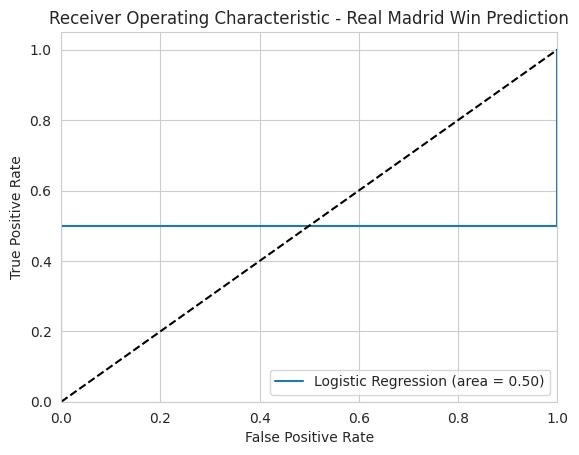


Logistic Regression Coefficients:
                    Feature  Coefficient
0                   RM_Home    -0.261998
1                   xG_diff     0.664275
2                 Form_diff    -0.585816
3               Injury_diff     0.517392
4                 Rest_diff     0.622827
5  Competition_Copa del Rey    -0.284421
6       Competition_La Liga    -0.492049
7     Competition_Supercopa     0.115205

Matches with Predicted Probability of Real Madrid Winning:
         Date         Home         Away  HomeGoals  AwayGoals  RM_Win  \
0  2015-01-31  Real Madrid    Barcelona          1          2       0   
1  2015-07-31    Barcelona  Real Madrid          1          0       0   
2  2016-01-31  Real Madrid    Barcelona          2          4       0   
3  2016-07-31  Real Madrid    Barcelona          2          1       1   
4  2017-01-31  Real Madrid    Barcelona          1          2       0   
5  2017-07-31    Barcelona  Real Madrid          0          0       0   
6  2018-01-31  Real Madri

In [36]:
import pandas as pd
import numpy as np

# Simulate an expanded dataset of El Clásico matches
# Assume we have data from the last 20 matches across different competitions

# Simulate data
np.random.seed(42)  # For reproducibility

num_matches = 20
data = {
    'Date': pd.date_range(start='2015-01-01', periods=num_matches, freq='6M'),
    'Home': np.random.choice(['Real Madrid', 'Barcelona'], size=num_matches),
    'Away': np.where(np.random.choice([True, False], size=num_matches), 'Real Madrid', 'Barcelona'),
    'HomeGoals': np.random.poisson(1.5, size=num_matches),
    'AwayGoals': np.random.poisson(1.5, size=num_matches),
    'Home_xG': np.random.uniform(0.5, 2.5, size=num_matches),
    'Away_xG': np.random.uniform(0.5, 2.5, size=num_matches),
    'Competition': np.random.choice(['La Liga', 'Copa del Rey', 'Champions League', 'Supercopa'], size=num_matches),
    'RM_Form': np.random.randint(0, 5, size=num_matches),  # Points from last 5 matches
    'Barca_Form': np.random.randint(0, 5, size=num_matches),
    'RM_Injuries': np.random.randint(0, 3, size=num_matches),  # Number of key players injured
    'Barca_Injuries': np.random.randint(0, 3, size=num_matches),
    'RM_Rest_Days': np.random.randint(3, 10, size=num_matches),  # Days since last match
    'Barca_Rest_Days': np.random.randint(3, 10, size=num_matches),
}

df = pd.DataFrame(data)

# Correct the 'Away' team to ensure it's the opposite of 'Home'
df['Away'] = df.apply(lambda row: 'Real Madrid' if row['Home'] == 'Barcelona' else 'Barcelona', axis=1)

# Create target variable: 1 if Real Madrid wins, 0 otherwise
def get_rm_win(row):
    if row['Home'] == 'Real Madrid' and row['HomeGoals'] > row['AwayGoals']:
        return 1
    elif row['Away'] == 'Real Madrid' and row['AwayGoals'] > row['HomeGoals']:
        return 1
    else:
        return 0

df['RM_Win'] = df.apply(get_rm_win, axis=1)

# Feature Engineering

# Feature: Is Real Madrid playing at home?
df['RM_Home'] = (df['Home'] == 'Real Madrid').astype(int)

# Calculate match-specific features
def get_rm_xg(row):
    return row['Home_xG'] if row['Home'] == 'Real Madrid' else row['Away_xG']

def get_barca_xg(row):
    return row['Away_xG'] if row['Home'] == 'Real Madrid' else row['Home_xG']

df['RM_xG'] = df.apply(get_rm_xg, axis=1)
df['Barca_xG'] = df.apply(get_barca_xg, axis=1)
df['xG_diff'] = df['RM_xG'] - df['Barca_xG']

# Form difference
df['Form_diff'] = df['RM_Form'] - df['Barca_Form']

# Injuries difference
df['Injury_diff'] = df['Barca_Injuries'] - df['RM_Injuries']

# Rest days difference
df['Rest_diff'] = df['RM_Rest_Days'] - df['Barca_Rest_Days']

# Competition encoding (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Competition'], drop_first=True)

# Features list
features = ['RM_Home', 'xG_diff', 'Form_diff', 'Injury_diff', 'Rest_diff'] + \
           [col for col in df.columns if 'Competition_' in col]

# Prepare X and y
X = df[features]
y = df['RM_Win']

# Split into training and test sets
from sklearn.model_selection import train_test_split

# To ensure reproducibility, set random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC Score:", roc_auc)

# ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Real Madrid Win Prediction')
plt.legend(loc="lower right")
plt.show()

# Display model coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_[0]
})
print("\nLogistic Regression Coefficients:")
print(coef_df)

# Predict the probability of winning for each match
df['RM_Win_Prob'] = lr_model.predict_proba(scaler.transform(X))[:, 1]

# Display the matches with predicted probabilities
results = df[['Date', 'Home', 'Away', 'HomeGoals', 'AwayGoals', 'RM_Win', 'RM_Win_Prob']]
print("\nMatches with Predicted Probability of Real Madrid Winning:")
print(results.sort_values('Date'))


In [ ]:
# import pandas as pd
# import numpy as np

# # Simulate an expanded dataset of El Clásico matches
# # Assume we have data from the last 20 matches across different competitions

# # Simulate data
# np.random.seed(42)  # For reproducibility

# num_matches = 20
# data = {
#     'Date': pd.date_range(start='2015-01-01', periods=num_matches, freq='6M'),
#     'Home': np.random.choice(['Real Madrid', 'Barcelona'], size=num_matches),
#     'Away': np.where(np.random.choice([True, False], size=num_matches), 'Real Madrid', 'Barcelona'),
#     'HomeGoals': np.random.poisson(1.5, size=num_matches),
#     'AwayGoals': np.random.poisson(1.5, size=num_matches),
#     'Home_xG': np.random.uniform(0.5, 2.5, size=num_matches),
#     'Away_xG': np.random.uniform(0.5, 2.5, size=num_matches),
#     'Competition': np.random.choice(['La Liga', 'Copa del Rey', 'Champions League', 'Supercopa'], size=num_matches),
#     'RM_Form': np.random.randint(0, 5, size=num_matches),  # Points from last 5 matches
#     'Barca_Form': np.random.randint(0, 5, size=num_matches),
#     'RM_Injuries': np.random.randint(0, 3, size=num_matches),  # Number of key players injured
#     'Barca_Injuries': np.random.randint(0, 3, size=num_matches),
#     'RM_Rest_Days': np.random.randint(3, 10, size=num_matches),  # Days since last match
#     'Barca_Rest_Days': np.random.randint(3, 10, size=num_matches),
# }

# df = pd.DataFrame(data)

# Correct the 'Away' team to ensure it's the opposite of 'Home'
df['Away'] = df.apply(lambda row: 'Real Madrid' if row['Home'] == 'Barcelona' else 'Barcelona', axis=1)

# Create target variable: 1 if Real Madrid wins, 0 otherwise
def get_rm_win(row):
    if row['Home'] == 'Real Madrid' and row['HomeGoals'] > row['AwayGoals']:
        return 1
    elif row['Away'] == 'Real Madrid' and row['AwayGoals'] > row['HomeGoals']:
        return 1
    else:
        return 0

df['RM_Win'] = df.apply(get_rm_win, axis=1)

# Feature Engineering

# Feature: Is Real Madrid playing at home?
df['RM_Home'] = (df['Home'] == 'Real Madrid').astype(int)

# Calculate match-specific features
def get_rm_xg(row):
    return row['Home_xG'] if row['Home'] == 'Real Madrid' else row['Away_xG']

def get_barca_xg(row):
    return row['Away_xG'] if row['Home'] == 'Real Madrid' else row['Home_xG']

df['RM_xG'] = df.apply(get_rm_xg, axis=1)
df['Barca_xG'] = df.apply(get_barca_xg, axis=1)
df['xG_diff'] = df['RM_xG'] - df['Barca_xG']

# Form difference
df['Form_diff'] = df['RM_Form'] - df['Barca_Form']

# Injuries difference
df['Injury_diff'] = df['Barca_Injuries'] - df['RM_Injuries']

# Rest days difference
df['Rest_diff'] = df['RM_Rest_Days'] - df['Barca_Rest_Days']

# Competition encoding (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Competition'], drop_first=True)

# Features list
features = ['RM_Home', 'xG_diff', 'Form_diff', 'Injury_diff', 'Rest_diff'] + \
           [col for col in df.columns if 'Competition_' in col]

# Prepare X and y
X = df[features]
y = df['RM_Win']

# Split into training and test sets
from sklearn.model_selection import train_test_split

# To ensure reproducibility, set random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC Score:", roc_auc)

# ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Real Madrid Win Prediction')
plt.legend(loc="lower right")
plt.show()

# Display model coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_[0]
})
print("\nLogistic Regression Coefficients:")
print(coef_df)

# Predict the probability of winning for each match
df['RM_Win_Prob'] = lr_model.predict_proba(scaler.transform(X))[:, 1]

# Display the matches with predicted probabilities
results = df[['Date', 'Home', 'Away', 'HomeGoals', 'AwayGoals', 'RM_Win', 'RM_Win_Prob']]
print("\nMatches with Predicted Probability of Real Madrid Winning:")
print(results.sort_values('Date'))
